Running experiment once with plot at the end for sanity check

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from statistics import mean

In [2]:
num_points = 100
num_experiments = 1000

In [3]:
x0 = rand.uniform(-1, 1)
y0 = rand.uniform(-1, 1)
x1 = rand.uniform(-1, 1)
y1 = rand.uniform(-1, 1)

m_f = (y1 - y0) / (x1 - x0)
b_f = y0 - m_f * x0
f = [m_f, b_f]

In [4]:
def classify_point(m, b, x, y):
    expected_value = m * x + b
    
    if y >= expected_value:
        return 1
    else:
        return -1

In [5]:
bias = [1] * num_points
x1 = [rand.uniform(-1, 1) for _ in range(num_points)]
x2 = [rand.uniform(-1, 1) for _ in range(num_points)]

xn = np.column_stack((x1, x2))
yn = [classify_point(m_f, b_f, x, y) for (x, y) in xn]

xn_bias = np.column_stack((bias, xn))
col = ['blue' if y < 0 else 'magenta' for y in yn]

In [6]:
matrix_X = np.array(xn)
matrix_X_bias = np.array(xn_bias)
matrix_y = np.array(yn)

In [7]:
w = np.matmul(np.linalg.pinv(matrix_X_bias), matrix_y)
w

array([-0.08832954, -1.51595558, -0.02733668])

In [8]:
m_g = -1 * w[1] / w[2]
b_g = -1 * w[0] / w[2]

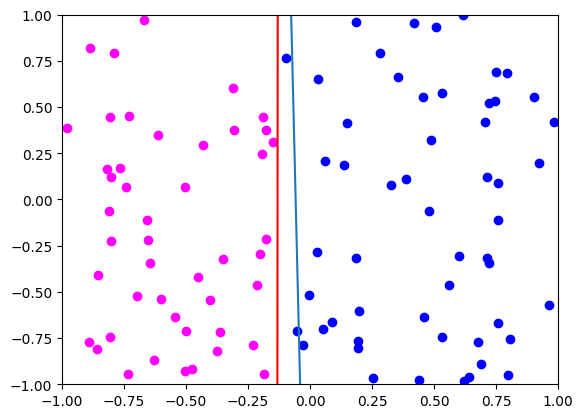

In [9]:
for i in range(num_points):
    plt.scatter(xn[i][0], xn[i][1], c=col[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axline((0, b_f), (1, m_f + b_f), c='red')
plt.axline((0, b_g), (1, m_g + b_g))

In [10]:
g_classification = [classify_point(m_g, b_g, x, y) for (x, y) in matrix_X]

In [11]:
Ein = 0

for i in range(len(g_classification)):
    if g_classification[i] != yn[i]:
        Ein += 1

Ein

98

Running Experiment for 1000 Trials

In [12]:
f = []
g = []
Ein = []

In [13]:
def generate_target_function():
    x0 = rand.uniform(-1, 1)
    y0 = rand.uniform(-1, 1)
    x1 = rand.uniform(-1, 1)
    y1 = rand.uniform(-1, 1)

    m_f = (y1 - y0) / (x1 - x0)
    b_f = y0 - m_f * x0
    f.append([m_f, b_f])
    
    return m_f, b_f

In [14]:
def calculate_E(E, f, g):
    E_curr = 0

    for i in range(len(g)):
        if f[i] != g[i]:
            E_curr += 1

    E.append(E_curr / num_points)

In [15]:
x1 = [rand.uniform(-1, 1) for _ in range(num_points)]
x2 = [rand.uniform(-1, 1) for _ in range(num_points)]

In [16]:
def run_trial():
    m_f, b_f = generate_target_function()
    
    bias = [1] * num_points

    xn = np.column_stack((x1, x2))
    yn = [classify_point(m_f, b_f, x, y) for (x, y) in xn]

    xn_bias = np.column_stack((bias, xn))

    matrix_X = np.array(xn)
    matrix_X_bias = np.array(xn_bias)
    matrix_y = np.array(yn)

    w = np.matmul(np.linalg.pinv(matrix_X_bias), matrix_y)

    m_g = -1 * w[1] / w[2]
    b_g = -1 * w[0] / w[2]
    
    g.append([m_g, b_g])

    gn = [classify_point(m_g, b_g, x, y) for (x, y) in matrix_X]

    calculate_E(Ein, yn, gn)

In [17]:
for i in range(num_experiments):
    run_trial()

In [18]:
mean(Ein)

0.06021

Out of Sample Prediction

In [19]:
Eout = []

In [20]:
def generate_out_of_sample():
    x1 = [rand.uniform(-1, 1) for _ in range(num_points)]
    x2 = [rand.uniform(-1, 1) for _ in range(num_points)]
    return x1, x2

In [21]:
for i in range(len(g)):
    x1, x2 = generate_out_of_sample()
    xn = np.column_stack((x1, x2))

    m_f, b_f = f[i]
    m_g, b_g = g[i]
    f_classfication = [classify_point(m_f, b_f, x, y) for (x, y) in xn]
    g_classfication = [classify_point(m_g, b_g, x, y) for (x, y) in xn]

    calculate_E(Eout, f_classfication, g_classfication)

mean(Eout)


0.06877

PLA Example (one run)

In [22]:
num_points = 10

In [23]:
x0 = rand.uniform(-1, 1)
y0 = rand.uniform(-1, 1)
x1 = rand.uniform(-1, 1)
y1 = rand.uniform(-1, 1)

m_f = (y1 - y0) / (x1 - x0)
b_f = y0 - m_f * x0
f = [m_f, b_f]

In [24]:
bias = [1] * num_points
x1 = [rand.uniform(-1, 1) for _ in range(num_points)]
x2 = [rand.uniform(-1, 1) for _ in range(num_points)]

xn = np.column_stack((x1, x2))
yn = [classify_point(m_f, b_f, x, y) for (x, y) in xn]

xn_bias = np.column_stack((bias, xn))
col = ['blue' if y < 0 else 'magenta' for y in yn]

In [25]:
def update_misclassified_points(m_f, b_f, m_g, b_g, xn, xn_bias):
    new_misclassified_points = []
    f_classfication = [classify_point(m_f, b_f, x, y) for (x, y) in xn]
    g_classfication = [classify_point(m_g, b_g, x, y) for (x, y) in xn]
    
    for i in range(len(f_classfication)):
        if f_classfication[i] != g_classfication[i]:
            new_misclassified_points.append([xn_bias[i], yn[i]])
    
    return new_misclassified_points

In [26]:
matrix_X = np.array(xn)
matrix_X_bias = np.array(xn_bias)
matrix_y = np.array(yn)

In [27]:
w = np.matmul(np.linalg.pinv(matrix_X_bias), matrix_y)
w

array([0.58852367, 0.80193894, 0.66348321])

In [28]:
iterations = [w]

In [29]:
m_g = -1 * w[1] / w[2]
b_g = -1 * w[0] / w[2]

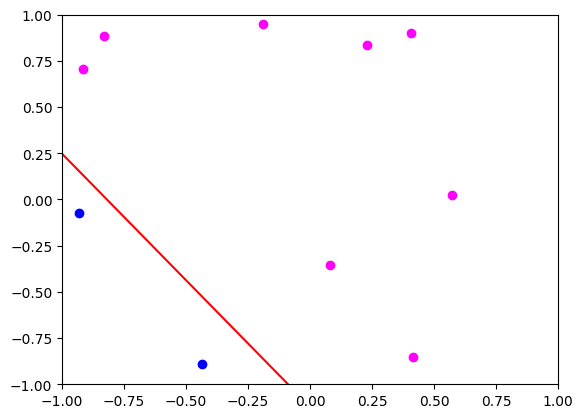

In [30]:
for i in range(num_points):
    plt.scatter(xn[i][0], xn[i][1], c=col[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axline((0, b_f), (1, m_f + b_f), c='red')

In [31]:
len_mp = [float('inf')]

In [32]:
def PLA():
    w = iterations[-1]
    m_g = -1 * w[1] / w[2]
    b_g = -1 * w[0] / w[2]
    
    misclassified_points = update_misclassified_points(m_f, b_f, m_g, b_g, xn, xn_bias)
    len_mp.append(len(misclassified_points))
    if len(misclassified_points) != 0:
        random_index = np.random.randint(0, len(misclassified_points))
        misclassified_point = misclassified_points[random_index]

        w = np.array(w) + misclassified_point[-1] * np.array(misclassified_point[0])
        iterations.append(w)
    else:
        return

In [33]:
while len_mp[-1] != 0:
    PLA()

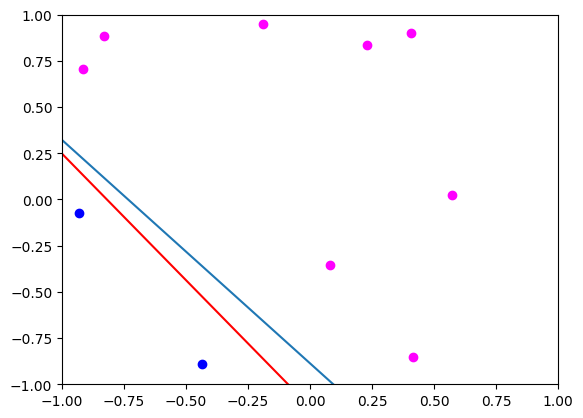

In [34]:
for i in range(num_points):
    plt.scatter(xn[i][0], xn[i][1], c=col[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axline((0, b_f), (1, m_f + b_f), c='red')
plt.axline((0, b_g), (1, m_g + b_g))

In [35]:
len(iterations)

1

PLA example (1000 runs)

In [36]:
num_experiments = 1000

In [37]:
def linear_regression():
    x0 = rand.uniform(-1, 1)
    y0 = rand.uniform(-1, 1)
    x1 = rand.uniform(-1, 1)
    y1 = rand.uniform(-1, 1)

    m_f = (y1 - y0) / (x1 - x0)
    b_f = y0 - m_f * x0
    
    bias = [1] * num_points
    x1 = [rand.uniform(-1, 1) for _ in range(num_points)]
    x2 = [rand.uniform(-1, 1) for _ in range(num_points)]

    xn = np.column_stack((x1, x2))
    yn = [classify_point(m_f, b_f, x, y) for (x, y) in xn]

    xn_bias = np.column_stack((bias, xn))
    
    matrix_X_bias = np.array(xn_bias)
    matrix_y = np.array(yn)
    
    w = np.matmul(np.linalg.pinv(matrix_X_bias), matrix_y)

    return w, m_f, b_f, [xn, xn_bias]

In [38]:
lin_reg_values = []
datasets = []

In [39]:
for i in range(num_experiments):
    w, m_f, b_f, dataset = linear_regression()
    lin_reg_values.append([w, m_f, b_f])
    datasets.append(dataset)

In [40]:
def PLA(w, m_f, b_f, xn, xn_bias):
    iterations = [w]
    
    misclassified_points = xn_bias
    
    while len(misclassified_points) != 0:
        new_w = iterations[-1]
        m_g = -1 * new_w[1] / new_w[2]
        b_g = -1 * new_w[0] / new_w[2]
        
        random_index = np.random.randint(0, len(misclassified_points))
        misclassified_point = misclassified_points[random_index]

        w = np.array(new_w) + misclassified_point[-1] * np.array(misclassified_point[0])
        iterations.append(new_w)
        
        misclassified_points = update_misclassified_points(m_f, b_f, m_g, b_g, xn, xn_bias)
    
    return len(iterations)

In [41]:
num_iter_arr = [] 

In [42]:
for i in range(1000):
    w, m_f, b_f = lin_reg_values[i]
    xn, xn_bias = datasets[i]
    num_iter = PLA(w, m_f, b_f, xn, xn_bias)
    num_iter_arr.append(num_iter)


KeyboardInterrupt: 

In [ ]:
num_iter